# Importing Packages and Looking into Data

In [1]:
import scipy
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
d_text =pd.read_csv("text.csv")
d_audio = pd.read_csv("audio.csv")
d_visual = pd.read_csv("visual.csv")
d_visual = d_visual.drop(['Victim','Attacker'],axis = 1)

In [3]:
for i in [d_text, d_audio,d_visual] :
    print(i.head())
    print('\n')
    print(i.describe())
    print('\n')
    print(i.info)
    print('\n')
    print('\n')

   TEXT_text_len  TEXT_percent_punctuation  TEXT_percent_uppercase  \
0           5900                  0.051864                0.098983   
1           2006                  0.032403                0.038385   
2            476                  0.018908                0.071429   
3           2248                  0.047598                0.097865   
4            807                  0.210657                0.063197   

   TEXT_text_sentiment  TEXT_percent_bad_words  TEXT_valence  TEXT_arousal  \
0               0.9998                0.018622      6.269027      4.447718   
1              -0.9988                0.029255      4.773950      4.549496   
2               0.9594                0.087912      6.132963      4.226667   
3               0.9839                0.029268      6.029189      4.088919   
4               0.9595                0.037383      5.828462      4.368462   

   TEXT_glove1  TEXT_glove2  TEXT_glove3            id     bully  
0    -0.308539     0.229137     0.054816  1

In [4]:
#changing target variable to integer
for i in [d_text, d_audio,d_visual] :
    i.replace(to_replace ='noneBll' ,value= 0 ,inplace =True) 
    i.replace(to_replace ='bullying' ,value= 1 ,inplace =True)
    
    


# Data Visualization

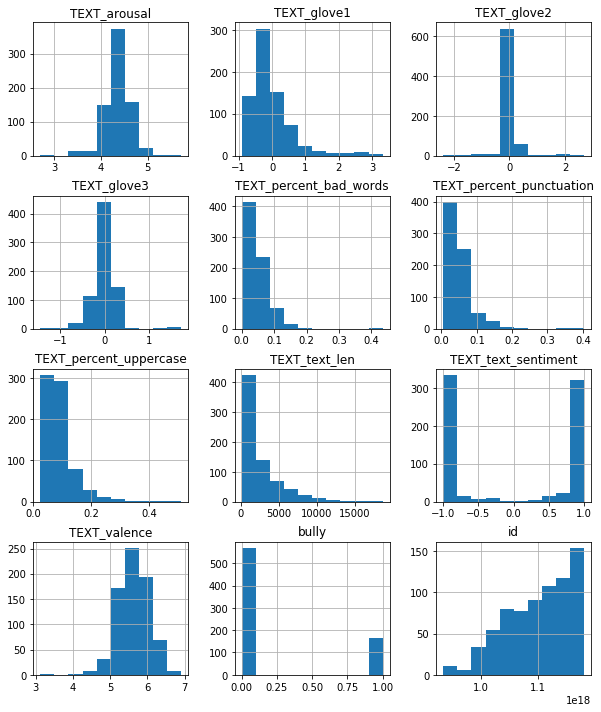

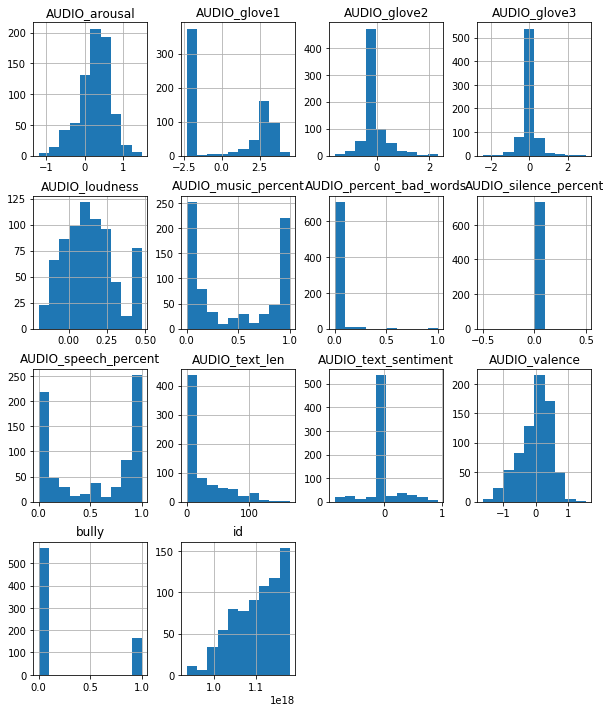

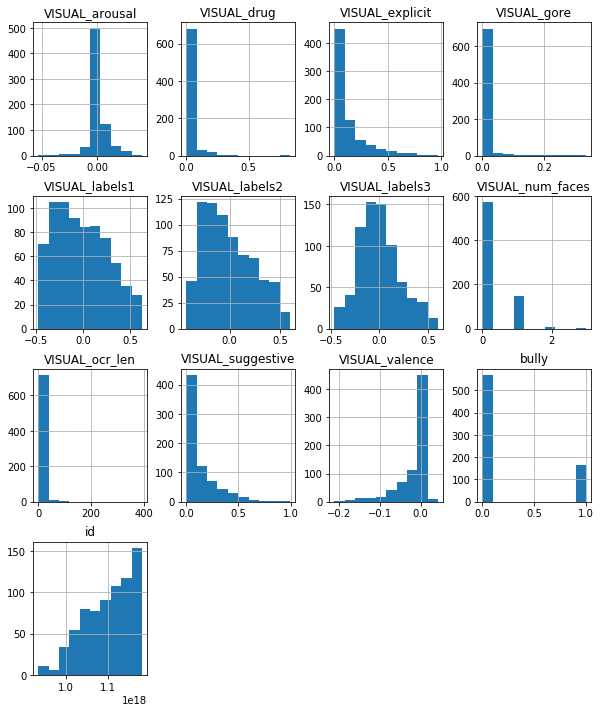

In [5]:
for i in [d_text, d_audio,d_visual] :
    i.hist(figsize = (10,12))
    

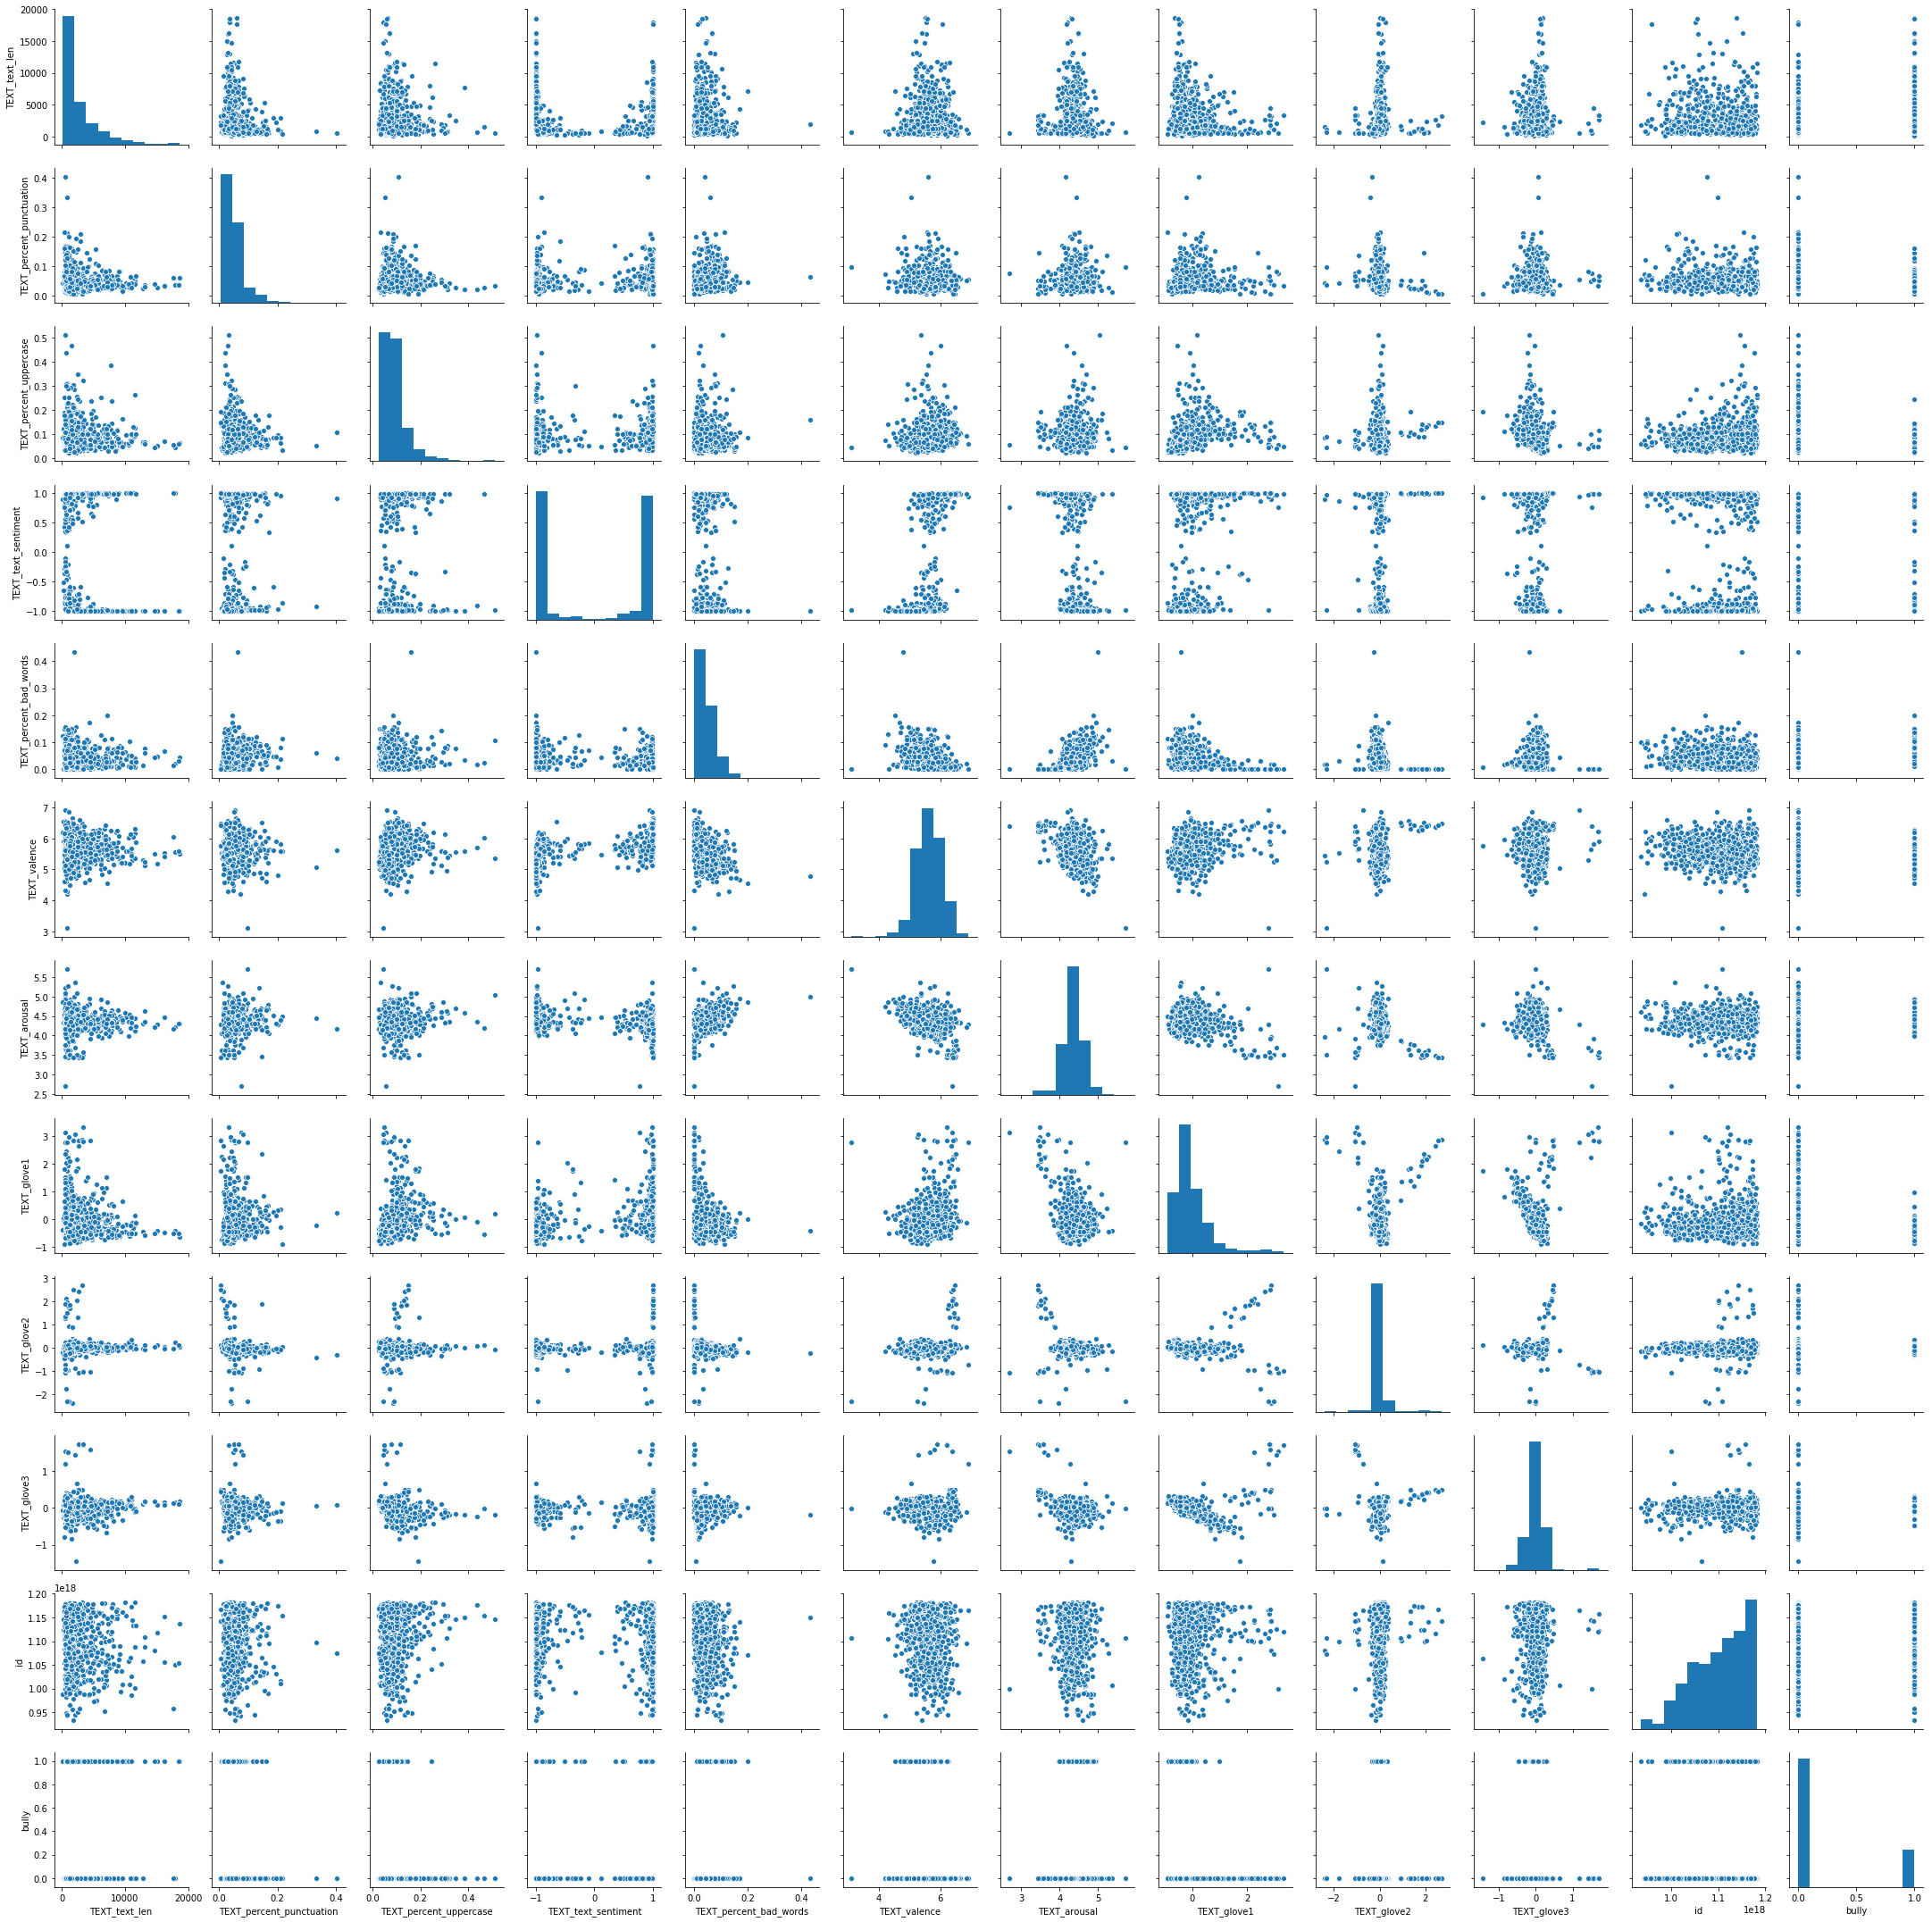

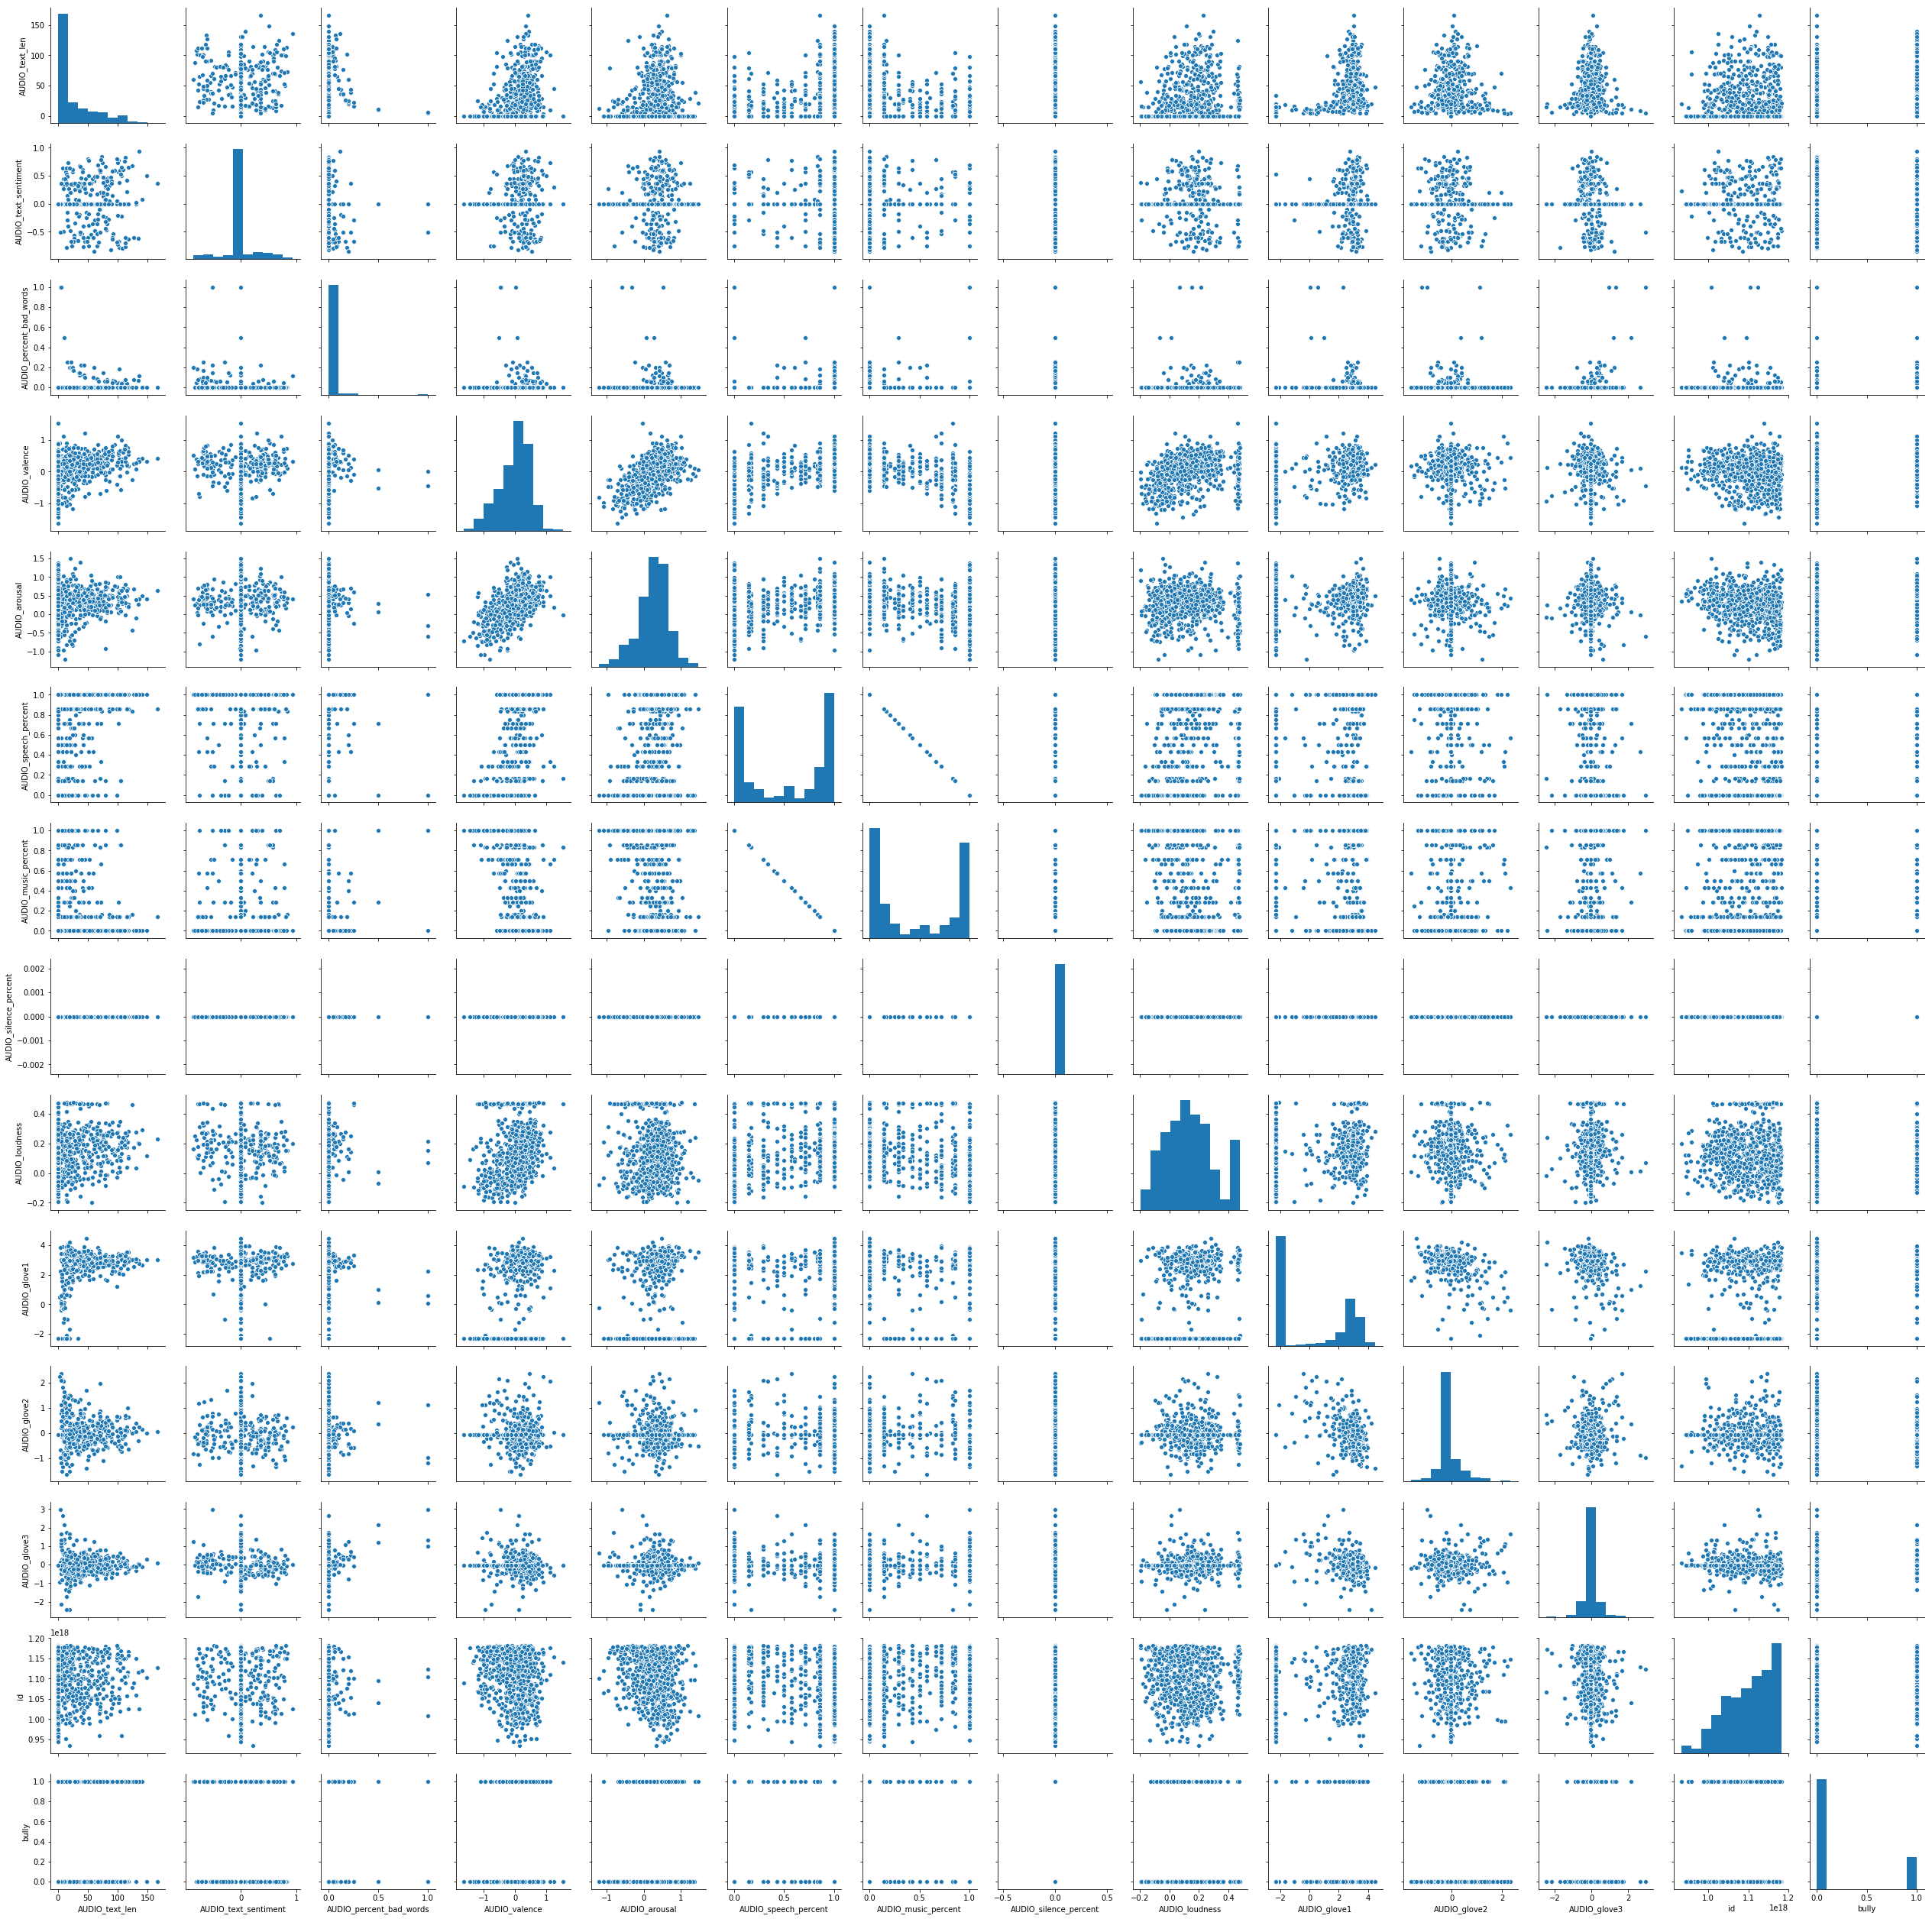

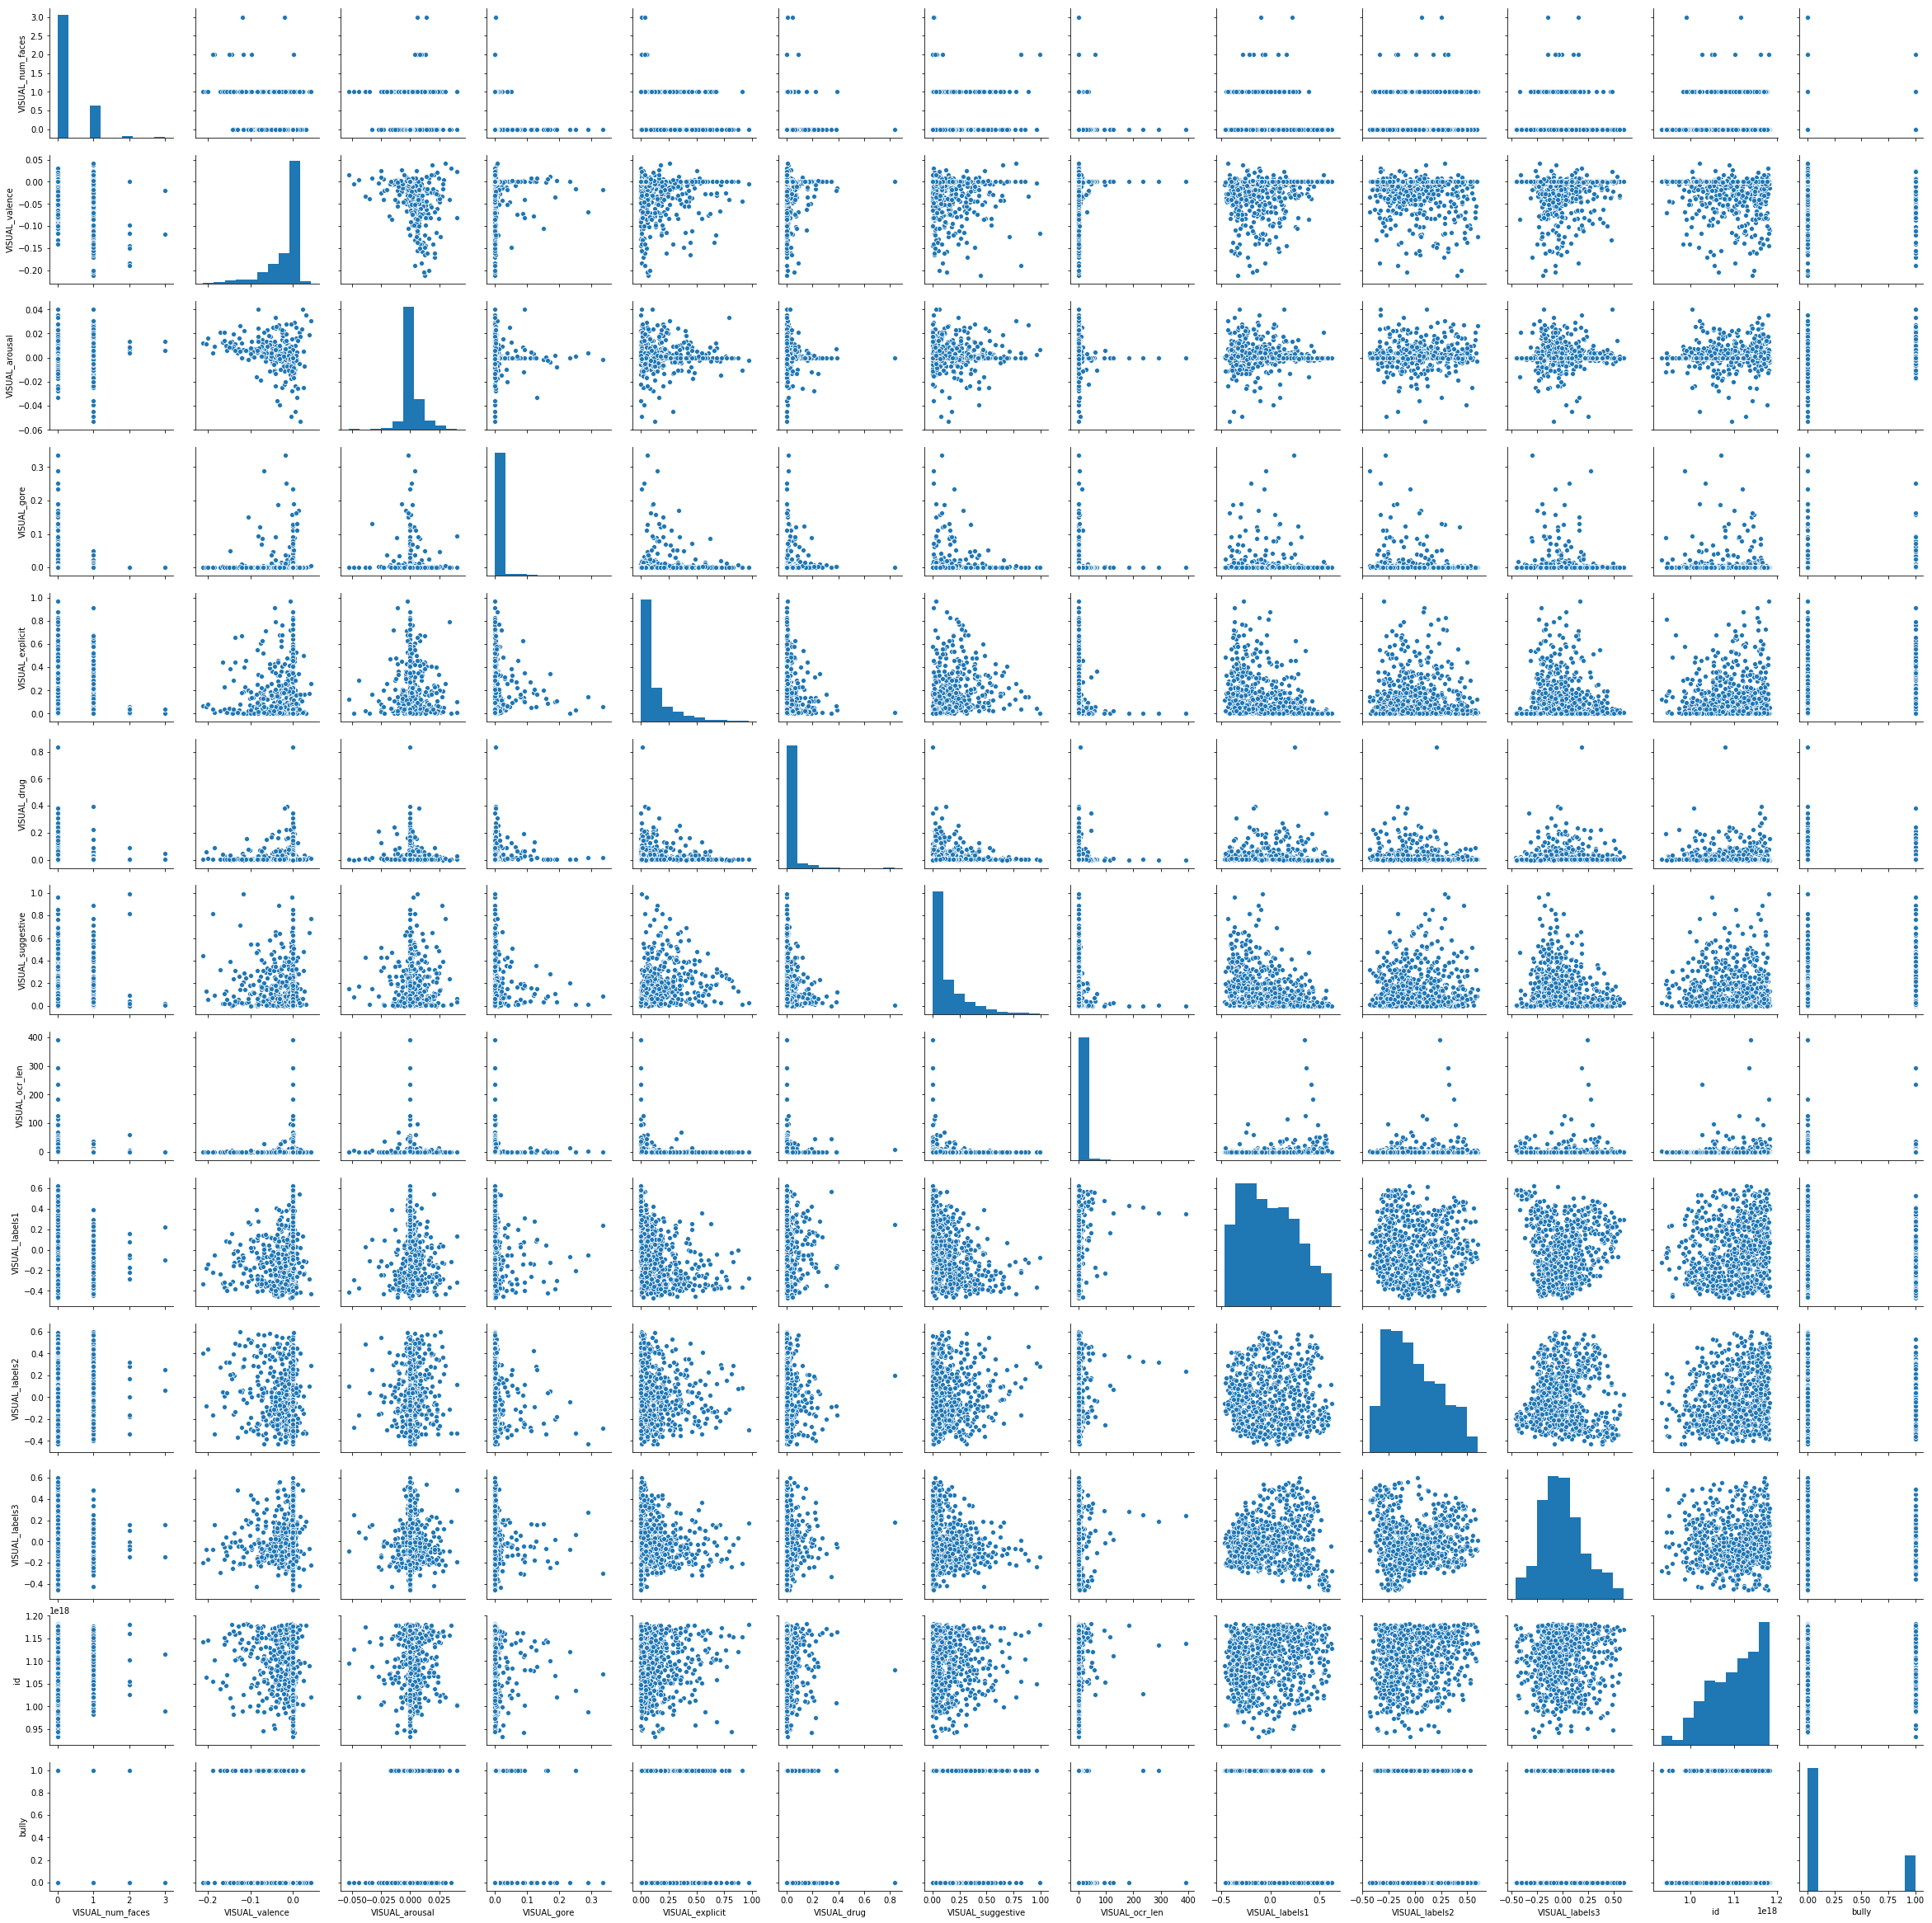

In [6]:
for i in [d_text, d_audio,d_visual] :
    sns.pairplot(i)

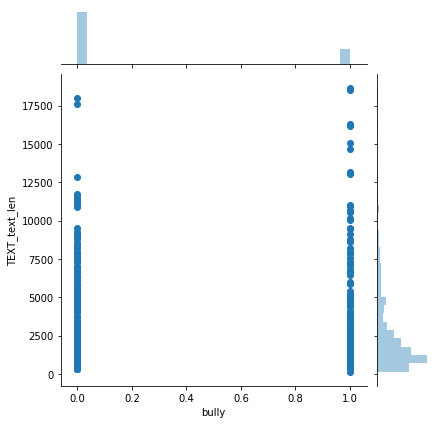

In [7]:
sns.jointplot(x='bully' , y = 'TEXT_text_len' , data = d_text)

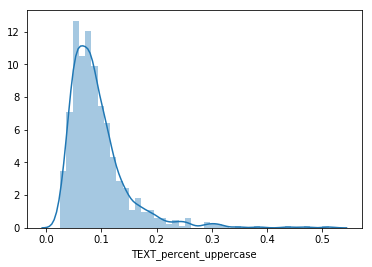

In [8]:
sns.distplot(d_text['TEXT_percent_uppercase'])

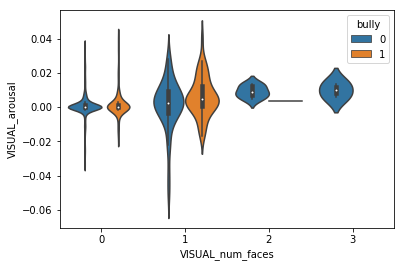

In [9]:
sns.violinplot( x='VISUAL_num_faces' , y = 'VISUAL_arousal' , hue = 'bully' , data = d_visual)

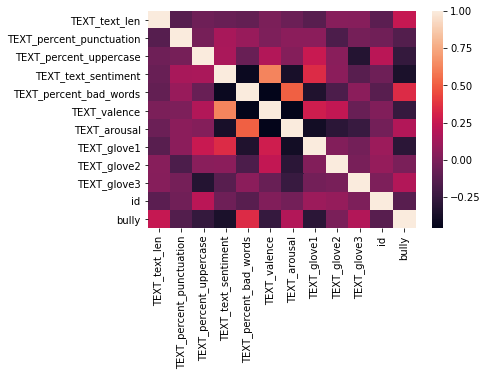

In [10]:
sns.heatmap(d_text.corr())   

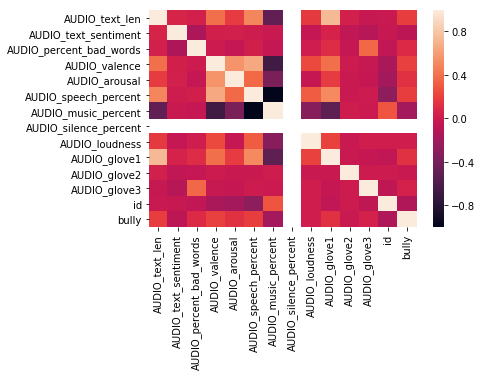

In [11]:
sns.heatmap(d_audio.corr())


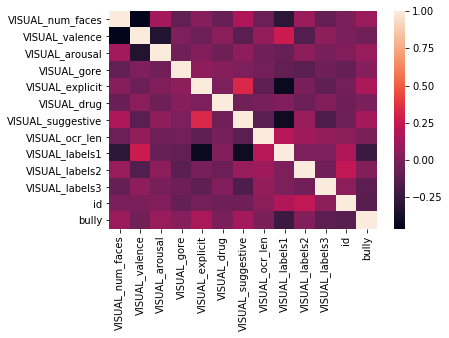

In [12]:
sns.heatmap(d_visual.corr())
 

In [13]:
d_text.head()

TEXT_text_len  TEXT_percent_punctuation  TEXT_percent_uppercase  \
0           5900                  0.051864                0.098983   
1           2006                  0.032403                0.038385   
2            476                  0.018908                0.071429   
3           2248                  0.047598                0.097865   
4            807                  0.210657                0.063197   

   TEXT_text_sentiment  TEXT_percent_bad_words  TEXT_valence  TEXT_arousal  \
0               0.9998                0.018622      6.269027      4.447718   
1              -0.9988                0.029255      4.773950      4.549496   
2               0.9594                0.087912      6.132963      4.226667   
3               0.9839                0.029268      6.029189      4.088919   
4               0.9595                0.037383      5.828462      4.368462   

   TEXT_glove1  TEXT_glove2  TEXT_glove3            id  bully  
0    -0.308539     0.229137     0.054816  1.078790e+18      1  
1    -0.338144     0.231156     0.139322  1.115990e+18      0  
2    -0.193417    -0.207916    -0.081402  1.010800e+18      0  
3    -0.198260    -0.030851     0.017429  1.003040e+18      0  
4     0.355768    -0.008185    -0.354074  1.015770e+18      0

# Data is imbalanced 

In [14]:
print(d_text['bully'].value_counts())
print(d_audio['bully'].value_counts())
print(d_visual['bully'].value_counts())

0    568
1    165
Name: bully, dtype: int64
0    568
1    165
Name: bully, dtype: int64
0    569
1    164
Name: bully, dtype: int64


# Balancing it using Resample

In [15]:
minority_text = d_text[d_text['bully']==1]
majority_text = d_text[d_text['bully'] ==0]
minority_audio = d_audio[d_audio['bully'] ==1]
majority_audio = d_audio[d_audio['bully']==0]
minority_visual = d_visual[d_visual['bully'] == 1]
majority_visual = d_visual[d_visual['bully']==0]

In [18]:
update_text = resample(minority_text , replace =True , n_samples = 568 , random_state =123)
update_audio = resample(minority_audio , replace =True ,n_samples = 568 , random_state =123)
update_visual = resample(minority_visual,replace = True , n_samples = 569 , random_state =123)



AUDIO_text_len  AUDIO_text_sentiment  AUDIO_percent_bad_words  \
489               0                0.0000                 0.000000   
560              50                0.0000                 0.000000   
311              56                0.2500                 0.000000   
450              11                0.0000                 0.500000   
60               54                0.1531                 0.000000   
383               0                0.0000                 0.000000   
474               0                0.0000                 0.000000   
544               0                0.0000                 0.000000   
246              67                0.6983                 0.000000   
447              13                0.0000                 0.000000   
516              21                0.0000                 0.000000   
560              50                0.0000                 0.000000   
213             118               -0.6310                 0.000000   
346              54                0.1531                 0.000000   
135              81               -0.4693                 0.062500   
501               0                0.0000                 0.000000   
686               6                0.0000                 1.000000   
383               0                0.0000                 0.000000   
364             136                0.9372                 0.115385   
724               0                0.0000                 0.000000   
447              13                0.0000                 0.000000   
315              30                0.0772                 0.000000   
217               0                0.0000                 0.000000   
241              28                0.2500                 0.000000   
19              102               -0.6810                 0.000000   
387              76                0.0000                 0.000000   
176              66                0.0000                 0.000000   
311              56                0.2500                 0.000000   
387              76                0.0000                 0.000000   
213             118               -0.6310                 0.000000   
..              ...                   ...                      ...   
430               0                0.0000                 0.000000   
346              54                0.1531                 0.000000   
315              30                0.0772                 0.000000   
560              50                0.0000                 0.000000   
548             106               -0.2263                 0.000000   
692              28               -0.3400                 0.000000   
596              34               -0.6597                 0.000000   
220              38                0.0000                 0.000000   
372               0                0.0000                 0.000000   
686               6                0.0000                 1.000000   
452              13                0.0000                 0.000000   
182               0                0.0000                 0.000000   
264               9                0.0000                 0.000000   
360               0                0.0000                 0.000000   
681               0                0.0000                 0.000000   
524              88               -0.8225                 0.000000   
441              89                0.3612                 0.000000   
560              50                0.0000                 0.000000   
711              20                0.0000                 0.000000   
170               0                0.0000                 0.000000   
528              33                0.2960                 0.000000   
0               124                0.6836                 0.000000   
532               0                0.0000                 0.000000   
65              115                0.0000                 0.040000   
493               0                0.0000                 0.000000   
684            

In [17]:
text = pd.concat([majority_text , update_text])
audio = pd.concat([majority_audio , update_audio])
video = pd.concat([majority_visual, update_visual])


In [18]:
print(text['bully'].value_counts())
print(audio['bully'].value_counts())
print(video['bully'].value_counts())


1    568
0    568
Name: bully, dtype: int64
1    568
0    568
Name: bully, dtype: int64
1    569
0    569
Name: bully, dtype: int64


# Preparing Data for Logistic Regression

In [19]:
X_text = text.drop('bully', axis =1 )
y_text = text['bully']
X_audio = audio.drop('bully' , axis =1)
y_audio = audio['bully']
X_video = video.drop('bully' ,axis =1)
y_video = video['bully']

In [20]:
#Splitting into train, test
X_text_train , X_text_test , y_text_train , y_text_test = train_test_split(X_text , y_text , test_size = 0.3 , random_state = 123)
X_audio_train , X_audio_test , y_audio_train , y_audio_text = train_test_split(X_audio , y_audio , test_size =0.3 , random_state=123)
X_video_train , X_video_test , y_video_train , y_video_test = train_test_split(X_video , y_video , test_size =0.3 , random_state =123)



In [21]:
#Normalizing each feature
Sc_x = StandardScaler()
X_text_train = Sc_x.fit_transform(X_text_train)
X_text_test = Sc_x.fit_transform(X_text_test)
X_audio_train = Sc_x.fit_transform(X_audio_train)
X_audio_test = Sc_x.fit_transform(X_audio_test)
X_video_train = Sc_x.fit_transform(X_video_train)
X_video_test = Sc_x.fit_transform(X_video_test)


C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with inpu

# Logistic Regression

In [22]:
model = LogisticRegression()

# Text dataset 

In [23]:
model.fit(X_text_train , y_text_train)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
text_pred = model.predict(X_text_test)
print(text_pred)

[1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0
 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1
 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 1 1 1 1 1]


In [25]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_text_test , text_pred)

array([[134,  41],
       [ 22, 144]], dtype=int64)

In [26]:
print(classification_report(y_text_test , text_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       175
           1       0.78      0.87      0.82       166

   micro avg       0.82      0.82      0.82       341
   macro avg       0.82      0.82      0.82       341
weighted avg       0.82      0.82      0.81       341



In [27]:
text_acc = cross_val_score (estimator = model , X = X_text_train , y = y_text_train , cv =5)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [28]:
print(text_acc)

[ 0.81875     0.83125     0.79245283  0.77848101  0.82278481]


In [32]:
print(text_acc.mean())

0.808743730595


# Audio Dataset

In [33]:
model.fit(X_audio_train , y_audio_train)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
audio_pred = model.predict(X_audio_test)
print(audio_pred)

[1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0
 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0
 1 0 1 1 1 1 0 1]


In [35]:
audio_acc = cross_val_score (estimator = model , X = X_audio_train , y = y_audio_train , cv =5)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [36]:
print(audio_acc)
print(audio_acc.mean())

[ 0.575       0.7         0.57861635  0.56329114  0.55696203]
0.594773903352


# Video Dataset

In [37]:
model.fit(X_video_train , y_video_train)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
video_pred = model.predict(X_video_test)
print(video_pred)

[1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0
 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1
 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 1 1 0 0]


In [42]:
print(confusion_matrix(y_video_test , video_pred))

[[108  67]
 [ 50 117]]


In [43]:
print(classification_report(y_video_test , video_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       175
           1       0.64      0.70      0.67       167

   micro avg       0.66      0.66      0.66       342
   macro avg       0.66      0.66      0.66       342
weighted avg       0.66      0.66      0.66       342



# Combining all the dataset

In [44]:
data = pd.read_csv('combine.csv')

In [45]:
data.head()


TEXT_text_len  TEXT_percent_punctuation  TEXT_percent_uppercase  \
0           5900                  0.051864                0.098983   
1           2006                  0.032403                0.038385   
2            476                  0.018908                0.071429   
3           2248                  0.047598                0.097865   
4            807                  0.210657                0.063197   

   TEXT_text_sentiment  TEXT_percent_bad_words  TEXT_valence  TEXT_arousal  \
0               0.9998                0.018622      6.269027      4.447718   
1              -0.9988                0.029255      4.773950      4.549496   
2               0.9594                0.087912      6.132963      4.226667   
3               0.9839                0.029268      6.029189      4.088919   
4               0.9595                0.037383      5.828462      4.368462   

   TEXT_glove1  TEXT_glove2  TEXT_glove3   ...     VISUAL_gore  \
0    -0.308539     0.229137     0.054816   ...        0.121265   
1    -0.338144     0.231156     0.139322   ...        0.000055   
2    -0.193417    -0.207916    -0.081402   ...        0.003495   
3    -0.198260    -0.030851     0.017429   ...        0.007416   
4     0.355768    -0.008185    -0.354074   ...        0.004017   

   VISUAL_explicit  VISUAL_drug  VISUAL_suggestive  VISUAL_ocr_len  \
0         0.176929     0.071883           0.095077        0.000000   
1         0.000070     0.000127           0.000150        3.833333   
2         0.194472     0.067911           0.231171        0.000000   
3         0.012575     0.023416           0.208229        0.000000   
4         0.111526     0.078706           0.190193        0.000000   

   VISUAL_labels1  VISUAL_labels2  VISUAL_labels3          id.2    bully  
0       -0.140656        0.422714       -0.051598  1.080000e+18  noneBll  
1        0.282171        0.121673        0.064595  1.120000e+18  noneBll  
2        0.085947       -0.221446        0.021952  1.010000e+18  noneBll  
3       -0.140205       -0.240972        0.198791  1.000000e+18  noneBll  
4        0.347749       -0.224979       -0.068936  1.020000e+18  noneBll  

[5 rows x 37 columns]

In [46]:
data.replace(to_replace ='bullying' ,value= 1 ,inplace =True)
    


In [47]:
data.replace(to_replace ='noneBll' ,value= 0 ,inplace =True)
    

In [48]:
data.head()

TEXT_text_len  TEXT_percent_punctuation  TEXT_percent_uppercase  \
0           5900                  0.051864                0.098983   
1           2006                  0.032403                0.038385   
2            476                  0.018908                0.071429   
3           2248                  0.047598                0.097865   
4            807                  0.210657                0.063197   

   TEXT_text_sentiment  TEXT_percent_bad_words  TEXT_valence  TEXT_arousal  \
0               0.9998                0.018622      6.269027      4.447718   
1              -0.9988                0.029255      4.773950      4.549496   
2               0.9594                0.087912      6.132963      4.226667   
3               0.9839                0.029268      6.029189      4.088919   
4               0.9595                0.037383      5.828462      4.368462   

   TEXT_glove1  TEXT_glove2  TEXT_glove3  ...    VISUAL_gore  VISUAL_explicit  \
0    -0.308539     0.229137     0.054816  ...       0.121265         0.176929   
1    -0.338144     0.231156     0.139322  ...       0.000055         0.000070   
2    -0.193417    -0.207916    -0.081402  ...       0.003495         0.194472   
3    -0.198260    -0.030851     0.017429  ...       0.007416         0.012575   
4     0.355768    -0.008185    -0.354074  ...       0.004017         0.111526   

   VISUAL_drug  VISUAL_suggestive  VISUAL_ocr_len  VISUAL_labels1  \
0     0.071883           0.095077        0.000000       -0.140656   
1     0.000127           0.000150        3.833333        0.282171   
2     0.067911           0.231171        0.000000        0.085947   
3     0.023416           0.208229        0.000000       -0.140205   
4     0.078706           0.190193        0.000000        0.347749   

   VISUAL_labels2  VISUAL_labels3          id.2  bully  
0        0.422714       -0.051598  1.080000e+18      0  
1        0.121673        0.064595  1.120000e+18      0  
2       -0.221446        0.021952  1.010000e+18      0  
3       -0.240972        0.198791  1.000000e+18      0  
4       -0.224979       -0.068936  1.020000e+18      0  

[5 rows x 37 columns]

In [49]:
data['bully'].value_counts()

0    569
1    164
Name: bully, dtype: int64

In [50]:
data_minority = data[data['bully'] == 1]

In [51]:
data_majority = data[data['bully'] == 0]

In [52]:
update_text = resample(data_minority , replace =True , n_samples = 569 , random_state =123)

In [53]:
data = pd.concat([data_majority,update_text])

In [54]:
data['bully'].value_counts()

1    569
0    569
Name: bully, dtype: int64

In [55]:
data.tail()

TEXT_text_len  TEXT_percent_punctuation  TEXT_percent_uppercase  \
526           4095                  0.045665                0.042247   
516           6742                  0.028033                0.046277   
27            7046                  0.044564                0.072098   
724           3483                  0.047373                0.067471   
321           1725                  0.022029                0.033043   

     TEXT_text_sentiment  TEXT_percent_bad_words  TEXT_valence  TEXT_arousal  \
526              -0.9990                0.043202      5.324430      4.138270   
516              -0.9998                0.111359      5.028744      4.637767   
27               -0.9969                0.060044      5.538545      4.334762   
724              -0.9992                0.079439      5.194025      4.711887   
321              -0.9994                0.084084      5.082426      4.603088   

     TEXT_glove1  TEXT_glove2  TEXT_glove3  ...    VISUAL_gore  \
526    -0.656190     0.176268     0.310081  ...       0.000232   
516    -0.739275    -0.013971     0.174800  ...       0.002860   
27     -0.306360     0.042864     0.076775  ...       0.000036   
724    -0.220736     0.063286     0.061028  ...       0.002045   
321    -0.454369     0.053019     0.077560  ...       0.001158   

     VISUAL_explicit  VISUAL_drug  VISUAL_suggestive  VISUAL_ocr_len  \
526         0.223893     0.022379           0.699671             0.0   
516         0.066069     0.384289           0.032618             0.0   
27          0.000980     0.000552           0.049903             2.5   
724         0.005860     0.005135           0.028607             0.0   
321         0.186627     0.008338           0.136470             0.0   

     VISUAL_labels1  VISUAL_labels2  VISUAL_labels3          id.2  bully  
526       -0.365113        0.032144       -0.057349  1.140000e+18      1  
516       -0.170455       -0.079290       -0.021838  1.010000e+18      1  
27         0.216205        0.084080        0.049505  1.070000e+18      1  
724        0.022750       -0.042366       -0.014026  9.890000e+17      1  
321       -0.350737       -0.161202       -0.011961  1.150000e+18      1  

[5 rows x 37 columns]

In [56]:
X_data = data.drop('bully' , axis =1)
y_data = data['bully']

In [57]:
X_train , X_test , y_train , y_test = train_test_split(X_data , y_data , test_size = 0.3 , random_state =123)
X_train.head()

TEXT_text_len  TEXT_percent_punctuation  TEXT_percent_uppercase  \
15            4706                  0.023587                0.113685   
530           1890                  0.019048                0.212169   
170          10027                  0.029520                0.062132   
402           1561                  0.023703                0.045484   
472           1601                  0.055590                0.078076   

     TEXT_text_sentiment  TEXT_percent_bad_words  TEXT_valence  TEXT_arousal  \
15               -0.9966                0.055781      5.285687      4.333812   
530               0.9651                0.009524      5.954889      4.203556   
170              -0.9999                0.064768      5.217514      4.592285   
402              -0.9968                0.059190      5.342857      4.236607   
472              -0.7950                0.006667      5.916066      4.221639   

     TEXT_glove1  TEXT_glove2  TEXT_glove3      ...       VISUAL_arousal  \
15     -0.746538     0.006022     0.132093      ...             0.015081   
530     0.727340    -0.179210    -0.163174      ...            -0.000096   
170    -0.445245     0.123899    -0.009839      ...             0.005717   
402    -0.629788    -0.024558     0.204670      ...             0.006325   
472    -0.263226     0.057464    -0.075741      ...            -0.011292   

     VISUAL_gore  VISUAL_explicit  VISUAL_drug  VISUAL_suggestive  \
15      0.001721         0.090143     0.039847           0.184340   
530     0.001449         0.511670     0.003926           0.114961   
170     0.000350         0.005227     0.153191           0.024824   
402     0.000014         0.004886     0.000045           0.994328   
472     0.000171         0.005839     0.013438           0.004132   

     VISUAL_ocr_len  VISUAL_labels1  VISUAL_labels2  VISUAL_labels3  \
15         0.000000       -0.305928       -0.143682       -0.167499   
530        0.000000       -0.183327       -0.257398       -0.029067   
170        0.000000       -0.358917       -0.051676       -0.096317   
402        0.000000       -0.076674        0.281241       -0.142136   
472        0.666667        0.003195        0.384929       -0.080721   

             id.2  
15   1.010000e+18  
530  1.110000e+18  
170  1.180000e+18  
402  1.180000e+18  
472  1.160000e+18  

[5 rows x 36 columns]

In [58]:
X_train = Sc_x.fit_transform(X_train)
X_test = Sc_x.fit_transform(X_test)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [59]:
model.fit(X_train , y_train)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
data_pred = model.predict(X_test)
print(data_pred)

[1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 1 1 1 0 0 1 1 0 1]


In [66]:
data_score = cross_val_score(estimator = model , X= X_train , y = y_train , cv =5)

C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ISHAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [67]:
data_score

array([ 0.8       ,  0.76875   ,  0.80503145,  0.81761006,  0.86075949])

In [68]:
data_score.mean()

0.81043020062096982

In [69]:
print(confusion_matrix(data_pred , y_test))
print(classification_report(data_pred, y_test))

[[138  26]
 [ 37 141]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       164
           1       0.84      0.79      0.82       178

   micro avg       0.82      0.82      0.82       342
   macro avg       0.82      0.82      0.82       342
weighted avg       0.82      0.82      0.82       342

